In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./dataset_avaliacoes.csv')

In [3]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


In [4]:
df.shape

(15501, 4)

In [6]:
df.value_counts("sentimento")

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

---

Bag of words: Avaliar a frequencia que cada palavra aparece nas avaliações

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

textos = ['Comprei um produto ótimo', 'Comprei um produto ruim']

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(textos)

In [8]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [9]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

Uma matriz esparsa (ou matriz dispersa) é uma matriz na qual a maioria dos elementos são iguais a zero. Em outras palavras, apenas uma pequena fração dos elementos é diferente de zero.

In [10]:
matriz_esparsa

,comprei,produto,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [ ]:
vetorizar = CountVectorizer(lowercase=False, max_features=50) # nao transforma tudo para minusculo e limita o df em 50 colunas
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 50)


In [14]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa

,Não,Produto,ainda,antes,as,até,bem,bom,chegou,com,...,qualidade,que,recebi,recomendo,se,sem,tem,um,uma,veio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15497,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
15498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15499,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df.sentimento, random_state=4978)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print(accuracy)

0.7982456140350878


In [18]:
from wordcloud import WordCloud

In [22]:
todas_palavras = ' '.join([texto for texto in df.avaliacao])

In [32]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

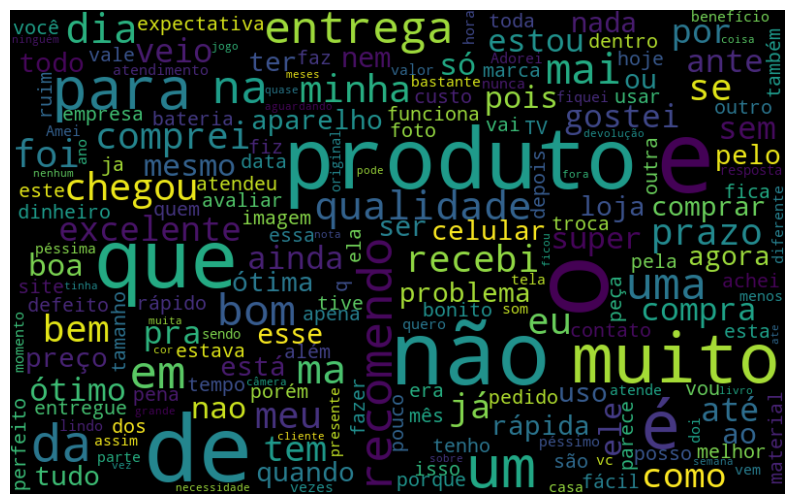

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

---

In [34]:
def gen_nuvem_palavras(texto, coluna_texto, sentimento):
    texto_sentimento = texto.query(f'sentimento =="{sentimento}"')[coluna_texto]
    
    texto_unido = ' '.join(texto_sentimento)
    
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

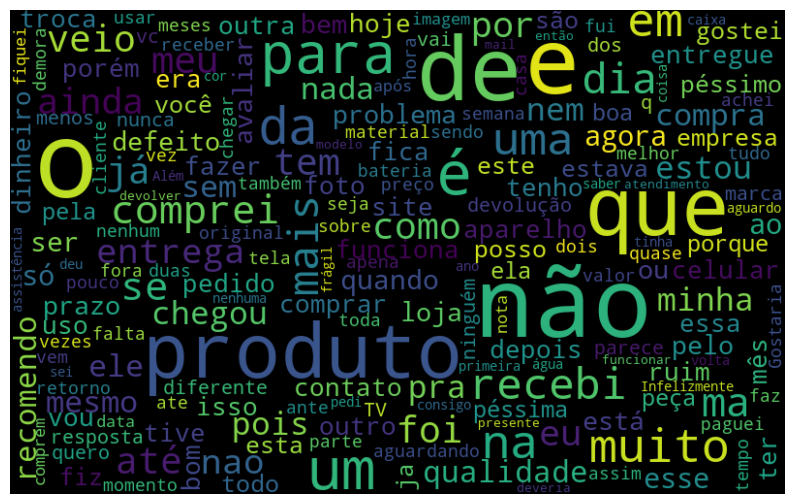

In [35]:
gen_nuvem_palavras(df, 'avaliacao', 'negativo')

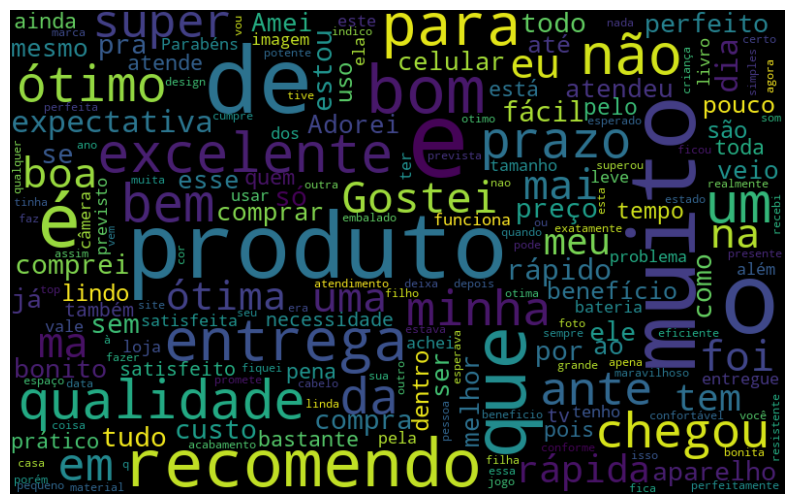

In [36]:
gen_nuvem_palavras(df, 'avaliacao', 'positivo')

In [ ]:
import nltk

nltk.download('all')

In [39]:
frases = ['um produto bom', 'um produto ruim']
frequencia = nltk.FreqDist(frases)

frequencia

FreqDist({'um produto bom': 1, 'um produto ruim': 1})

In [40]:
from nltk import tokenize

frase = 'O produto é excelente e a entrega foi muito rápida!'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)

print(token_frase)

['O', 'produto', 'é', 'excelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida!']


In [41]:
token_frase = token_espaco.tokenize(todas_palavras)

In [43]:
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({
    'Palavra': list(frequencia.keys()),
    'Frequencia': list(frequencia.values())
    })

In [44]:
df_frequencia.head()

,Palavra,Frequencia
0,Esse,101
1,smartphone,33
2,superou,90
3,minhas,533
4,"expectativas,",79
